<a href="https://colab.research.google.com/github/Vishwajeet111/Classification-of-Leaves-disease/blob/master/Classification_of_Leaves_Disease_based_on_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Mounting from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Setting up constant
image_size = 256
channels = 3

In [4]:
def ImageAugmentation(location, shuffle):
  datagen = ImageDataGenerator(
      rescale = 1./255, rotation_range = 10, horizontal_flip = True)
  image_generator = datagen.flow_from_directory(
      location, target_size = (image_size, image_size),batch_size = 32,class_mode = "sparse", shuffle = shuffle)

  return image_generator

In [5]:
train_generator = ImageAugmentation('/content/drive/MyDrive/Leaves Disease Training CNN/train',shuffle = True)
test_generator = ImageAugmentation('/content/drive/MyDrive/Leaves Disease Training CNN/test',shuffle = False)
val_generator = ImageAugmentation('/content/drive/MyDrive/Leaves Disease Training CNN/val',shuffle = True)

Found 21472 images belonging to 19 classes.
Found 2700 images belonging to 19 classes.
Found 2678 images belonging to 19 classes.


In [11]:
# printing the class name
class_names = list(train_generator.class_indices.keys())
for index, name in enumerate(class_names):
  print(index,'--',name)

0 -- Grape___Black_rot
1 -- Grape___Esca_(Black_Measles)
2 -- Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
3 -- Grape___healthy
4 -- Pepper,_bell___Bacterial_spot
5 -- Pepper,_bell___healthy
6 -- Potato___Early_blight
7 -- Potato___Late_blight
8 -- Potato___healthy
9 -- Tomato___Bacterial_spot
10 -- Tomato___Early_blight
11 -- Tomato___Late_blight
12 -- Tomato___Leaf_Mold
13 -- Tomato___Septoria_leaf_spot
14 -- Tomato___Spider_mites Two-spotted_spider_mite
15 -- Tomato___Target_Spot
16 -- Tomato___Tomato_Yellow_Leaf_Curl_Virus
17 -- Tomato___Tomato_mosaic_virus
18 -- Tomato___healthy


In [13]:
input_shape = (image_size,image_size,channels)
n_classes = 19
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    # 1st convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    # 2nd convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    # 3rd convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    # 4th convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    # 5th convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),
    # 6th convolution and pooling layer
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',strides=(1, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [14]:
# Compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['sparse_categorical_accuracy'])

In [17]:
history = model.fit(train_generator,steps_per_epoch=len(train_generator),batch_size=32,validation_data=val_generator,validation_steps=len(val_generator),
                    verbose=1,epochs=20)

Epoch 1/20
671/671 [==============================] - 7534s 11s/step - loss: 1.2155 - sparse_categorical_accuracy: 0.5998 - val_loss: 0.8063 - val_sparse_categorical_accuracy: 0.7356
Epoch 2/20
671/671 [==============================] - 446s 664ms/step - loss: 0.5656 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.4039 - val_sparse_categorical_accuracy: 0.8697
Epoch 3/20
671/671 [==============================] - 403s 600ms/step - loss: 0.3852 - sparse_categorical_accuracy: 0.8687 - val_loss: 0.2965 - val_sparse_categorical_accuracy: 0.8977
Epoch 4/20
671/671 [==============================] - 407s 606ms/step - loss: 0.3069 - sparse_categorical_accuracy: 0.8931 - val_loss: 0.2546 - val_sparse_categorical_accuracy: 0.9164
Epoch 5/20
671/671 [==============================] - 403s 601ms/step - loss: 0.2497 - sparse_categorical_accuracy: 0.9120 - val_loss: 0.2226 - val_sparse_categorical_accuracy: 0.9201
Epoch 6/20
671/671 [==============================] - 403s 601ms/step - loss: 0.2

In [18]:
# Checking the accuracy and loss percentage
test_loss, test_accuracy = model.evaluate(test_generator)
print('The accuracy is {} and loss is {}'.format(test_accuracy,test_loss))

85/85 [==============================] - 823s 10s/step - loss: 0.2047 - sparse_categorical_accuracy: 0.9519
The accuracy is 0.9518518447875977 and loss is 0.20465022325515747


<h4>Loss Graph</h4>

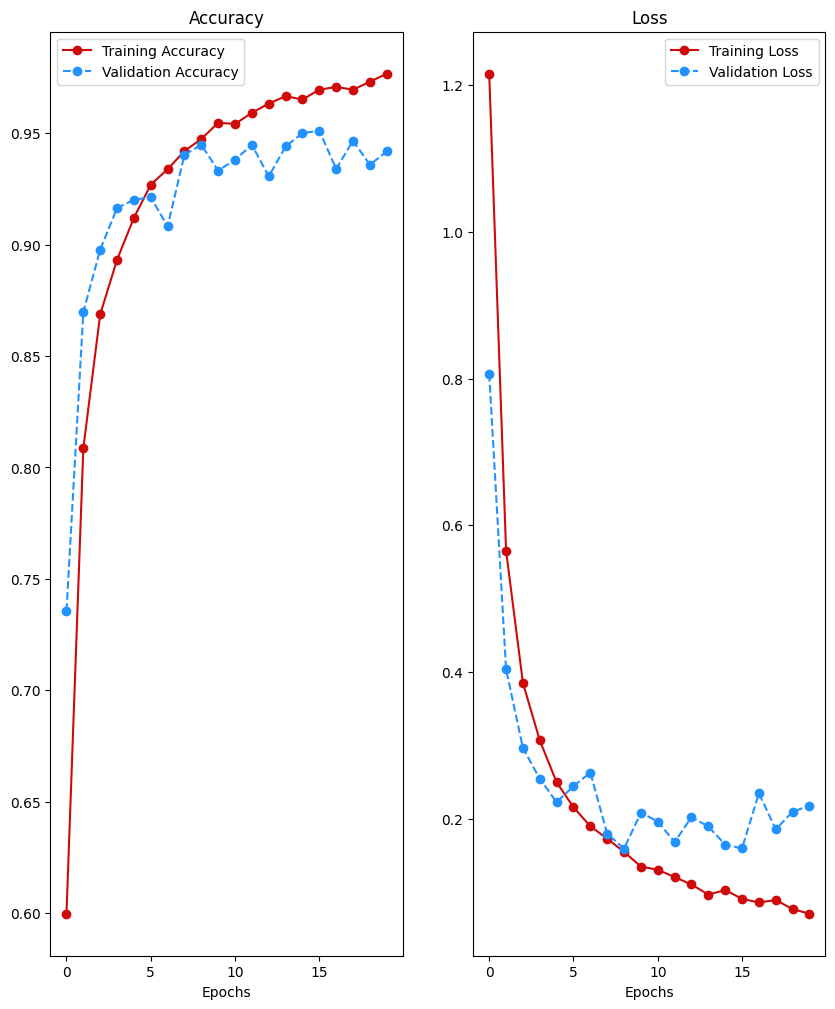

In [21]:
accuracy = history.history['sparse_categorical_accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_sparse_categorical_accuracy']
val_loss = history.history['val_loss']
epochs_range = range(20)

# plotting the accuracy graph
plt.rcParams['figure.figsize'] = (10,12)
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy,'-o', label='Training Accuracy',color="#CF0A0A")
plt.plot(epochs_range, val_accuracy,'o--', label='Validation Accuracy',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Accuracy')
# plotting the loss graph
plt.subplot(1,2,2)
plt.plot(epochs_range, loss,'-o', label='Training Loss',color="#CF0A0A")
plt.plot(epochs_range, val_loss,'o--', label='Validation Loss',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Loss')
plt.show();

<h4>Confusion Matrix</h4>

85/85 [==============================] - 45s 530ms/step


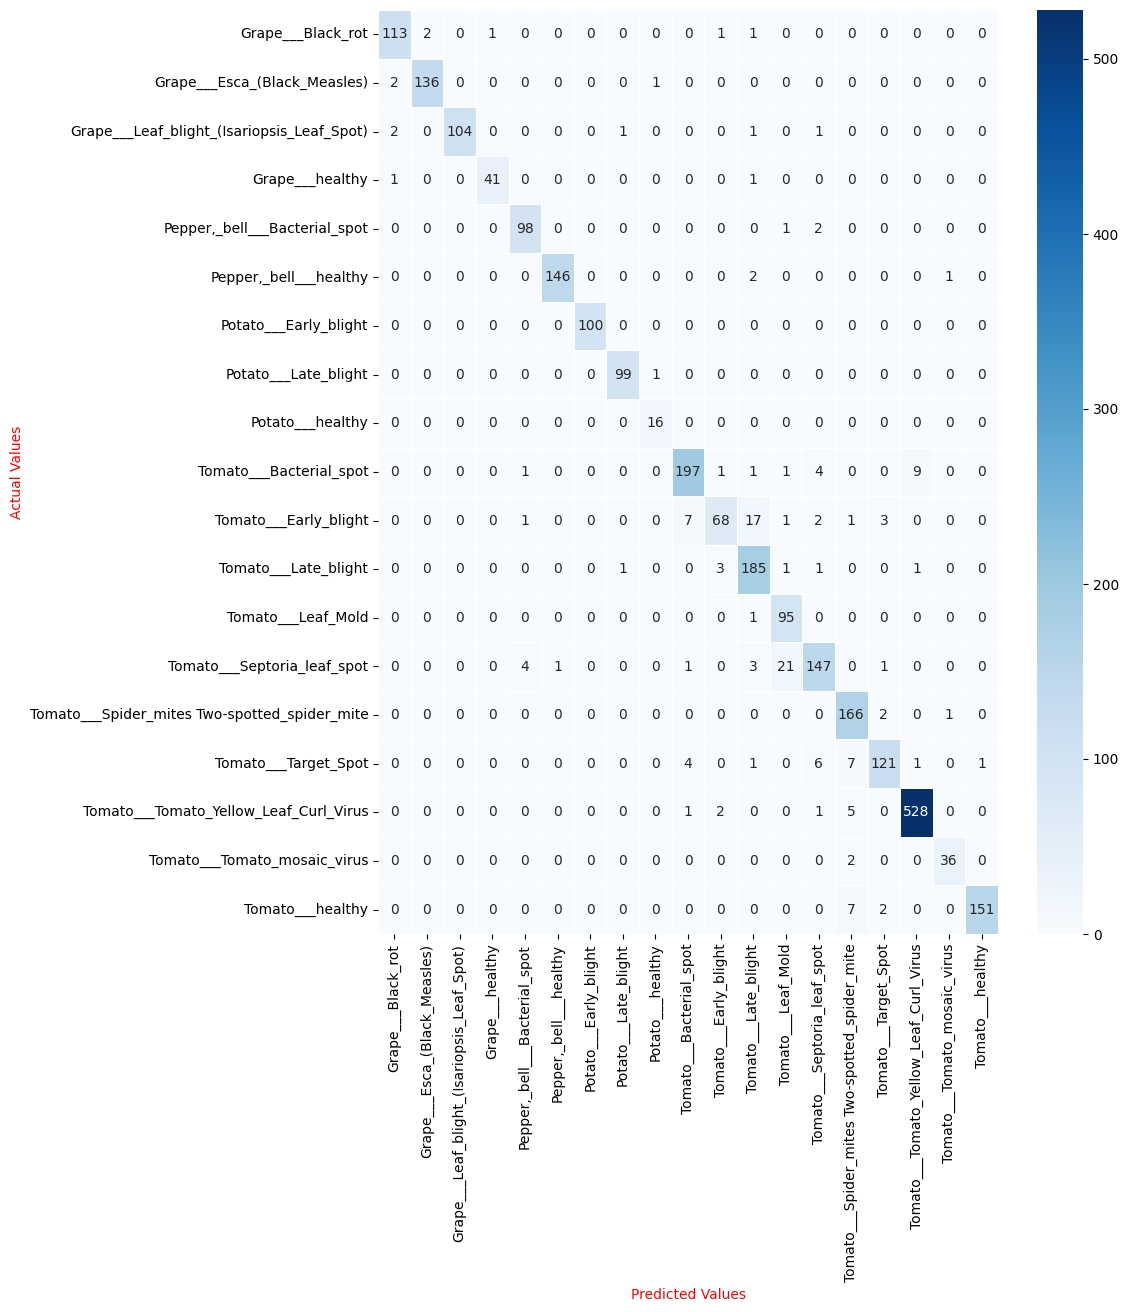

In [23]:
# predicting the images from test_generator
y_prob = model.predict(test_generator, verbose = True)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)
# plotting the matrix
sns.heatmap(cm,annot=True,cmap="Blues",fmt='g',linewidth=.5,xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Values",size=10,color='red')
plt.ylabel("Actual Values",size=10,color='red')
plt.show()

<h4> Classification Report </h4>

In [24]:
# classification report
print(classification_report(test_generator.classes, y_pred, target_names=class_names))

                                               precision    recall  f1-score   support

                            Grape___Black_rot       0.96      0.96      0.96       118
                 Grape___Esca_(Black_Measles)       0.99      0.98      0.98       139
   Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      0.95      0.98       109
                              Grape___healthy       0.98      0.95      0.96        43
                Pepper,_bell___Bacterial_spot       0.94      0.97      0.96       101
                       Pepper,_bell___healthy       0.99      0.98      0.99       149
                        Potato___Early_blight       1.00      1.00      1.00       100
                         Potato___Late_blight       0.98      0.99      0.99       100
                             Potato___healthy       0.89      1.00      0.94        16
                      Tomato___Bacterial_spot       0.94      0.92      0.93       214
                        Tomato___Early_bli

<h4>Predicting Random Images</h4>

In [25]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array, verbose=0)
  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [26]:
test_generator.shuffle = True

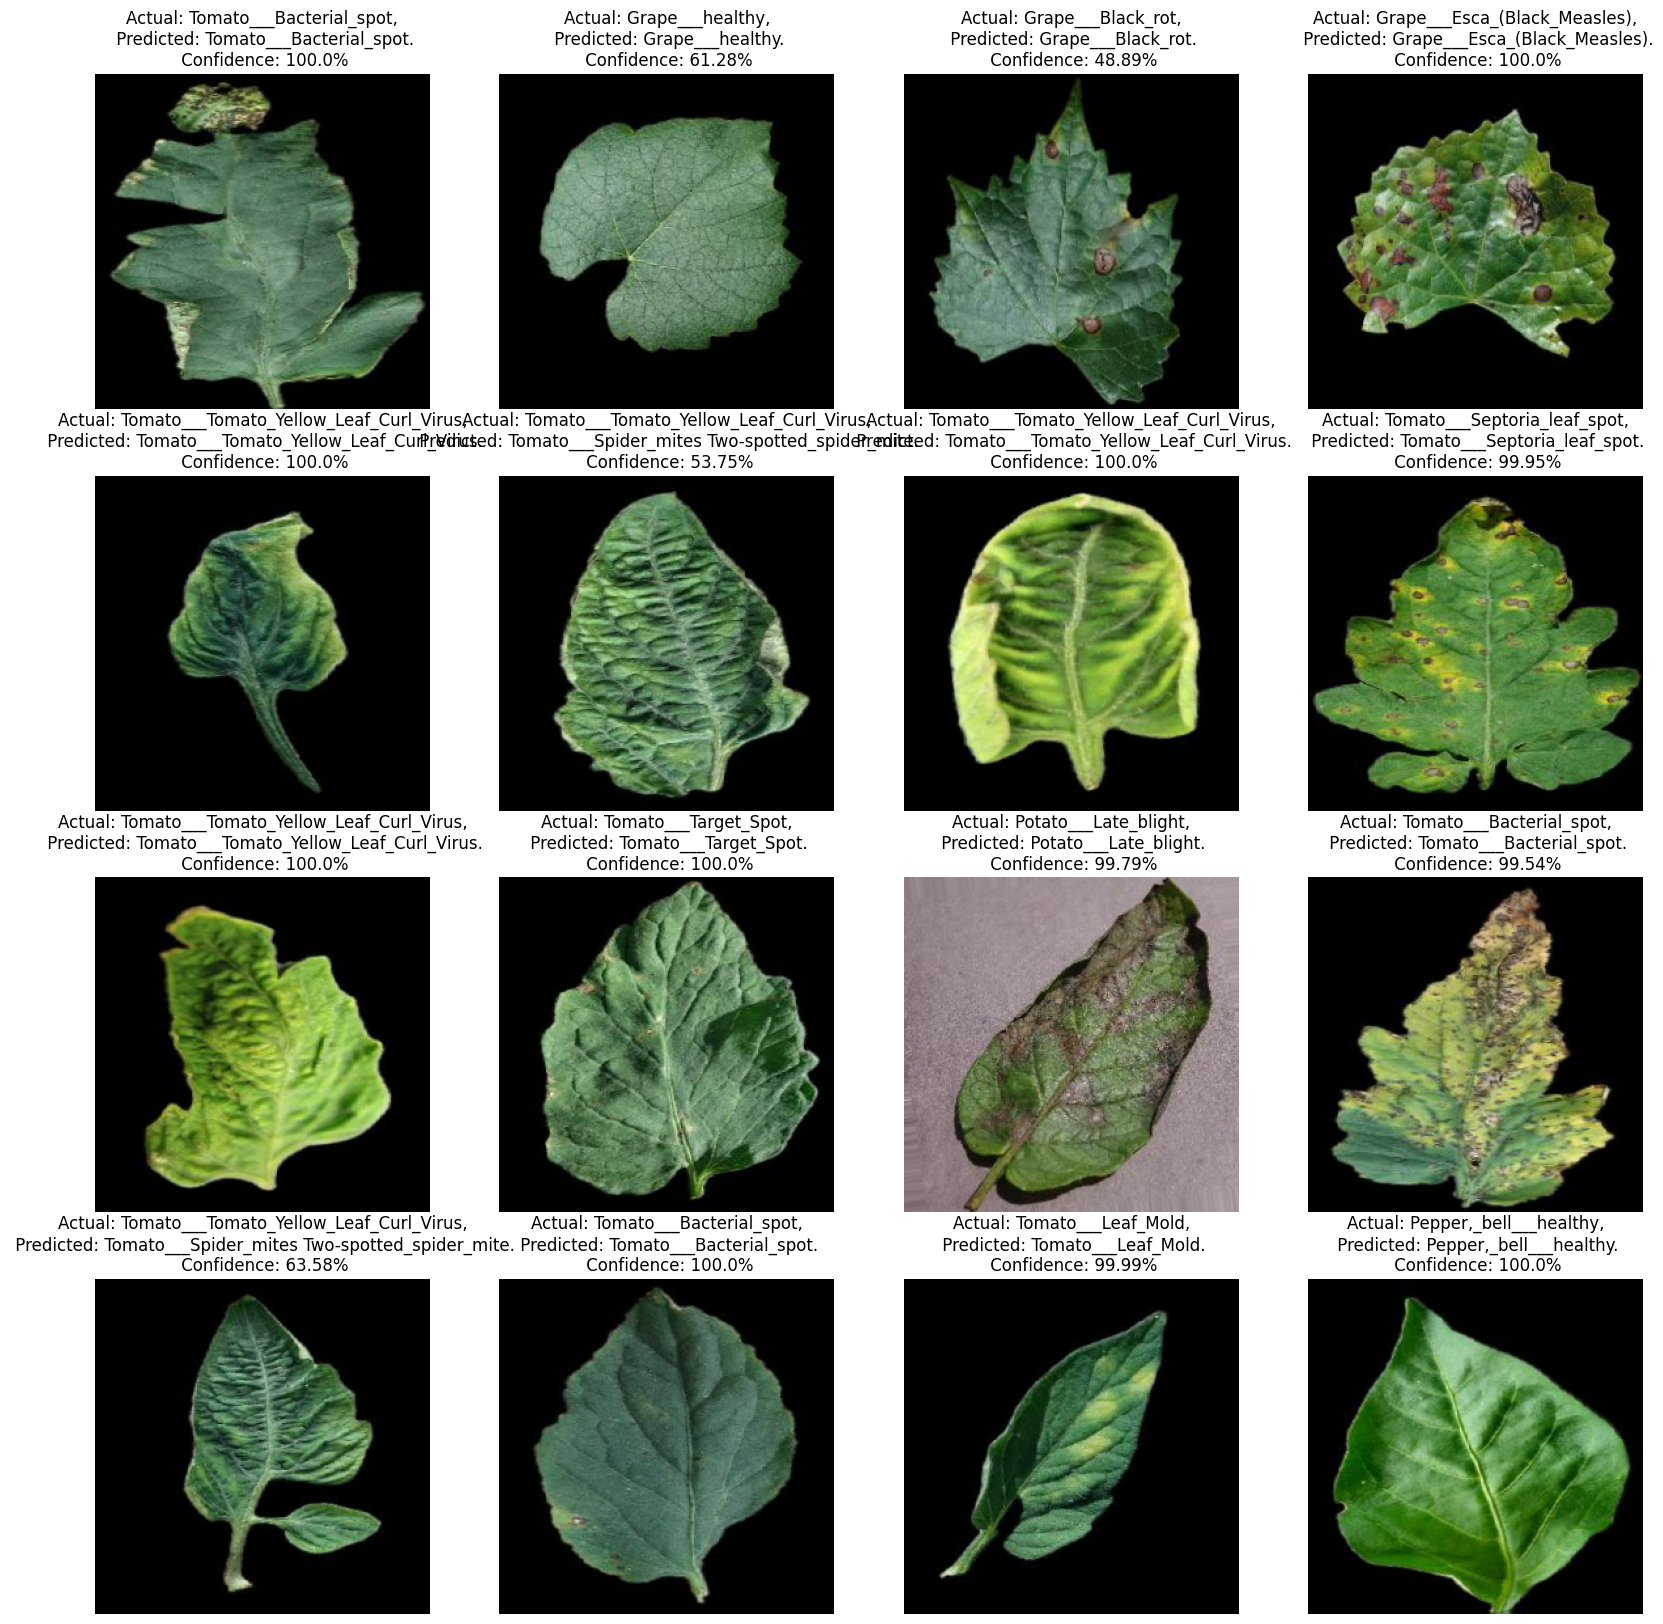

In [27]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break